In [1]:
%load_ext rpy2.ipython

In [2]:
%%R
library(dplyr); library(tidyr)
library(phyloseq)
library(ggplot2)
library(vegan)
library(FField)

/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: 
Attaching package: ‘dplyr’


  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: The following objects are masked from ‘package:stats’:

    filter, lag


  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Loading required package: permute

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Loading required package: lattice

  res = super(Function, self).__call__

In [3]:
%%R
sd = read.csv("/home/armanda/N-project/data/HB_Depth/HBD_HANM.csv", stringsAsFactors = FALSE) %>%
    select(Sample.Name, Depth)

rownames(sd) = sd$Sample.Name
sd = sample_data(sd)

In [4]:
%%R
counts = read.csv("/home/armanda/N-project/data/HB_Depth/HBD_HANM.csv", stringsAsFactors = FALSE) %>%
    gather(key, value, -Sample.Name, -Depth) %>%
    select(Sample.Name, key, value) %>%
    spread(key, value)

rownames(counts) = counts$Sample.Name

counts$Sample.Name = NULL

counts = otu_table(counts, taxa_are_rows = FALSE)

In [5]:
%%R
ps = phyloseq(sd, counts)
ps

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 11095 taxa and 15 samples ]
sample_data() Sample Data:       [ 15 samples by 2 sample variables ]


Square root transformation
Wisconsin double standardization
Run 0 stress 0.03009435 
Run 1 stress 0.02626523 
... New best solution
... procrustes: rmse 0.02884867  max resid 0.07284824 
Run 2 stress 0.03388075 
Run 3 stress 0.03445445 
Run 4 stress 0.03327895 
Run 5 stress 0.02626512 
... New best solution
... procrustes: rmse 7.80488e-05  max resid 0.0001433624 
*** Solution reached


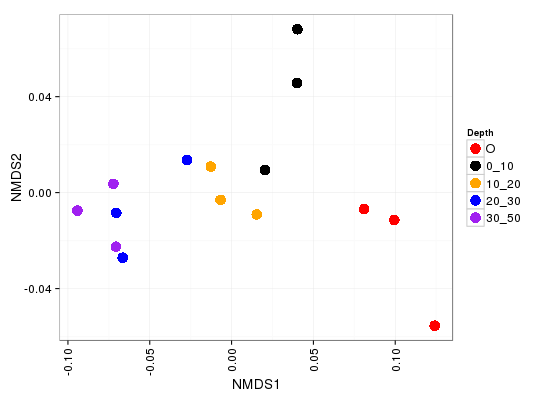

In [9]:
%%R -h 400 -w 550
ord = ordinate(ps, method = "NMDS", distance = "bray")

ord.plot = plot_ordination(ps, ord, justDF = TRUE)
ord.plot$Depth = factor(ord.plot$Depth, levels = c("O", "0_10", "10_20","20_30","30_50"))

ord.plot.nmds = ord.plot

x.fact <- 100 / max(ord.plot.nmds$NMDS1)
y.fact <- 100 / max(ord.plot.nmds$NMDS2)

coords = FFieldPtRep(coords = cbind(ord.plot.nmds$NMDS1 * x.fact,
                                    ord.plot.nmds$NMDS2 * y.fact), 
                     rep.fact = 70)

ord.plot.nmds$text.x = coords$x / x.fact
ord.plot.nmds$text.y = coords$y / y.fact

p = ggplot(ord.plot.nmds, aes(x = NMDS1, y = NMDS2, color = Depth))

p = p + geom_point(size = 5)

p = p + scale_color_manual(values = c("red", "black", "orange", "blue", "purple"))

#p = p + scale_shape_manual(values = c(6, 15, 1, 18, 10))

p = p + scale_size_discrete(range = c(4,8))

#p = p + geom_text(color = "black", aes(x = text.x, 
                                       #y = text.y,
                                       #label = Sample.Name), size = 4, vjust = 1.5, hjust = 0.5)

p = p + theme_bw()
p = p + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1, size = 12), 
              axis.text.y = element_text(size = 12), 
              axis.title.x = element_text(size = 14), 
              axis.title.y = element_text(size = 14), 
              strip.text.x = element_text(size = 14), 
              strip.text.y = element_text(size = 14),
              legend.text = element_text(size = 12), 
              strip.background = element_blank())

p = p + guides(color = guide_legend(override.aes = list(size=5)),
               shape = guide_legend(override.aes = list(size = 5)))          

p

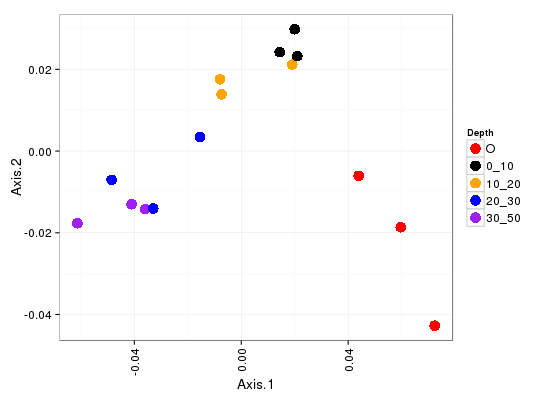

In [14]:
%%R -h 400 -w 550
ord = ordinate(ps, method = "PCoA", distance = "bray")

ord.plot = plot_ordination(ps, ord, justDF = TRUE)

ord.plot$Depth = factor(ord.plot$Depth, levels = c("O", "0_10", "10_20","20_30","30_50"))

ord.plot.mds = ord.plot

p = ggplot(ord.plot.mds, aes(x = Axis.1, y = Axis.2, color = Depth))

p = p + geom_point(size = 5)

p = p + scale_size_discrete(range = c(4,8))

p = p + scale_color_manual(values = c("red", "black", "orange", "blue", "purple"))

p = p + scale_shape_manual(values = c(6, 15, 1, 18, 10))

#p = p + geom_text(color = "black", aes(x = Axis.1, 
                                       #y = Axis.2,
                                       #label = Sample.Name), size = 4, vjust = 1.75, hjust = 0.5)

p = p + theme_bw()
p = p + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1, size = 12), 
              axis.text.y = element_text(size = 12), 
              axis.title.x = element_text(size = 14), 
              axis.title.y = element_text(size = 14), 
              strip.text.x = element_text(size = 14), 
              strip.text.y = element_text(size = 14),
              legend.text = element_text(size = 12), 
              strip.background = element_blank())

p = p + guides(color = guide_legend(override.aes = list(size=5)),
               shape = guide_legend(override.aes = list(size = 5)))

p

In [ ]:
%%R
bray.dist = distance(ps, method = "bray")

data = data.frame(sample_data(ps))

data$Depth = factor(data$Depth, levels = c("D", "W", "H", "F"))

adonis(bray.dist ~ Location, data)